In [21]:
%load_ext google.datalab.kernel

The google.datalab.kernel extension is already loaded. To reload it, use:
  %reload_ext google.datalab.kernel


In [22]:
!pip install -r ../src/xgb_training/requirements.txt

E1104 18:22:42.202657092    3705 backup_poller.cc:130]       Run client channel backup poller: {"created":"@1572891762.202571437","description":"pollset_work","file":"src/core/lib/iomgr/ev_epoll1_linux.cc","file_line":242,"referenced_errors":[{"created":"@1572891762.202568367","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epoll1_linux.cc","file_line":730,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}


In [23]:
import sys
import math

import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, '../src/xgb_training')
from trainer import model

## Download the booster from GCS and save to local FS

## Get training and validation data

In [24]:
import argparse  
parser = argparse.ArgumentParser()
parser.add_argument("bucket", type=str)
parser.add_argument("--filename", type=str, default="model.pkl")
parser.add_argument("--bucket_path", type=str, default="model")
parser.add_argument("--eta", type=float, default=0.1)
parser.add_argument("--max_depth", type=int, default=3)
parser.add_argument("--subsample", type=float, default=1.0)
parser.add_argument("--lambda", type=float, default=1.0)
parser.add_argument("--alpha", type=float, default=0)
parser.add_argument("--tree_method", type=str, default="hist")
parser.add_argument("--predictor", type=str, default="cpu_predictor")
parser.add_argument("--n_jobs", type=int, default=1)
parser.add_argument("--objective", type=str, default="reg:linear")
parser.add_argument("--eval_metric ", type=str, default="rmse")
args, _ = parser.parse_known_args()
args = vars(args)

In [25]:
x_train, y_train, x_test, y_test, cols = model.process_data(test_partition_name="test")

## Fit training data

In [26]:
xg_reg = model.train(x_train, y_train, x_test, y_test, cols, args)

[18:22:46] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.


## Predict testing data

In [27]:
y_pred = model.predict_regressor(xg_reg, x_test)

## RMSE

In [28]:
score = model.rmse(y_pred, y_test)
print("Test RMSE: %.2f" % (score))

Test RMSE: 337724.04


## R-squared

In [29]:
r2 = model.r2(xg_reg, x_test, y_test)
print("R^2: %.2f" % (r2))

R^2: 0.85


## Plot feature importance

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


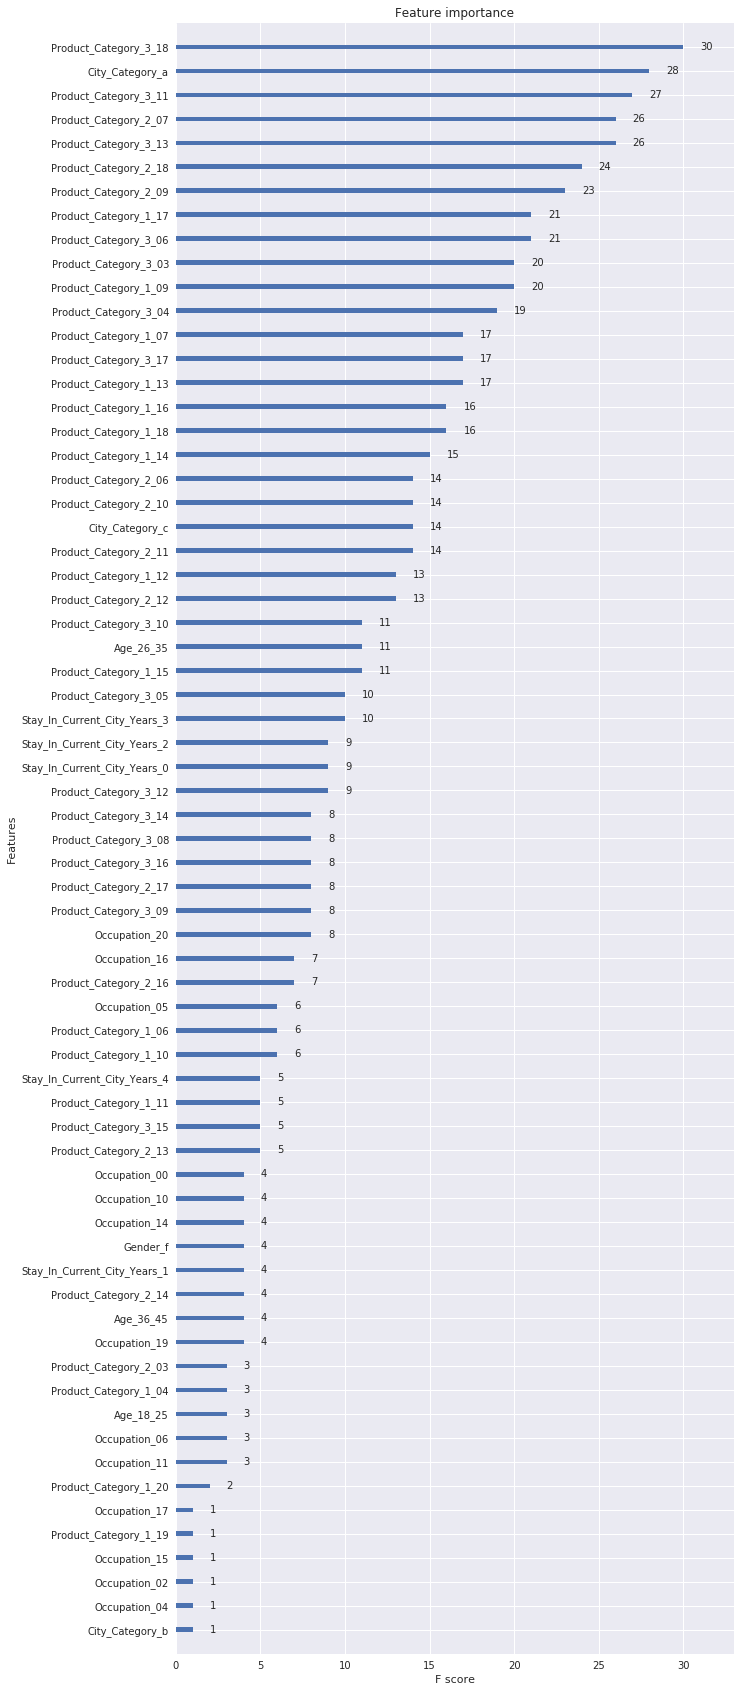

In [30]:
ax = xgb.plot_importance(xg_reg)
fig = ax.figure
fig.set_size_inches(10, 30)

In [ ]:
model.delete_model(filename)

In [2]:
%storage read -o gs://gcp-cert-demo-2/model/model.bst -v booster

Source object gs://gcp-cert-demo-2/model/model.bst does not exist


In [ ]:
filename = "model.bst"
filehand = open(filename, "wb")
filehand.write(booster)
filehand.close()